In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [ ]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')


In [ ]:
#Converting them to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#Printing the shapes of the training
print("========================================")
print("Shape of X_train is  :", X_train.shape)
print("Shape of y_train is  :", y_train.shape)
print("Shape of X_test is   :", X_test.shape)
print("Shape of y_test is   :", y_test.shape)
print("========================================")

Shape of X_train is  : (9690, 2304)
Shape of y_train is  : (9690, 1)
Shape of X_test is   : (3090, 2304)
Shape of y_test is   : (3090, 1)


In [ ]:
#Reshaping the training and test dataset
X_train_reshape = X_train.reshape(len(X_train),48,48)
X_test_reshape = X_test.reshape(len(X_test),48,48)

In [ ]:
#Prining New shapes of the training and test dataset
print("========================================")
print("Shape of X_train is  :", X_train_reshape.shape)
print("Shape of X_test is   :", X_test_reshape.shape)
print("========================================")

Shape of X_train is  : (9690, 48, 48)
Shape of X_test is   : (3090, 48, 48)


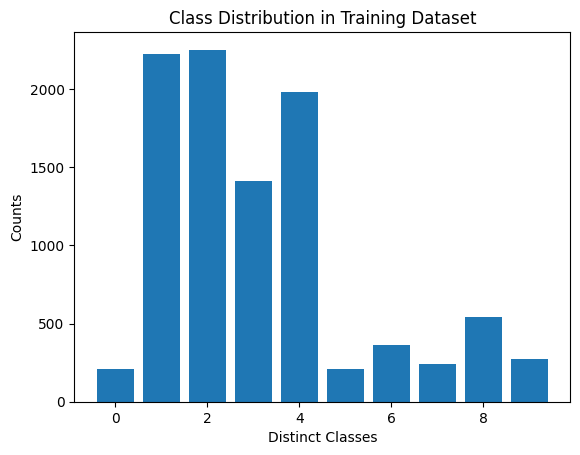

In [ ]:
#Calulating the counts of records for each class in the training dataset

#Getting unique values and the counts
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
#Plotting the graph
plt.bar(unique_values_train, counts_train)
plt.xlabel('Distinct Classes')
plt.ylabel('Counts')
plt.title('Class Distribution in Training Dataset')
plt.show()

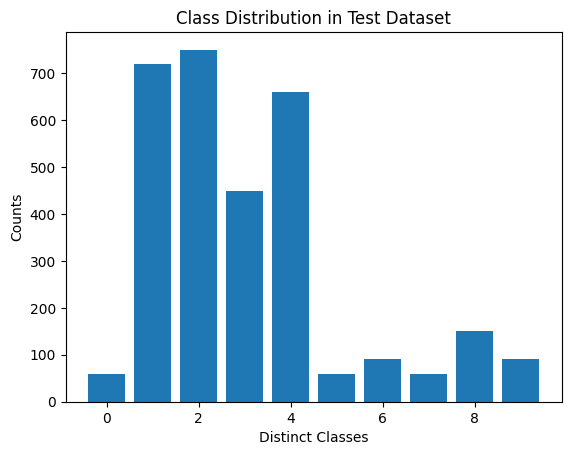

In [ ]:
#Calulating the counts of records for each class in the test dataset

#Getting unique values and the counts
unique_values_test, counts_test = np.unique(y_test, return_counts=True)
total_count = len(y_test)
#Plotting the graph
plt.bar(unique_values_test, counts_test)
plt.xlabel('Distinct Classes')
plt.ylabel('Counts')
plt.title('Class Distribution in Test Dataset')
plt.show()

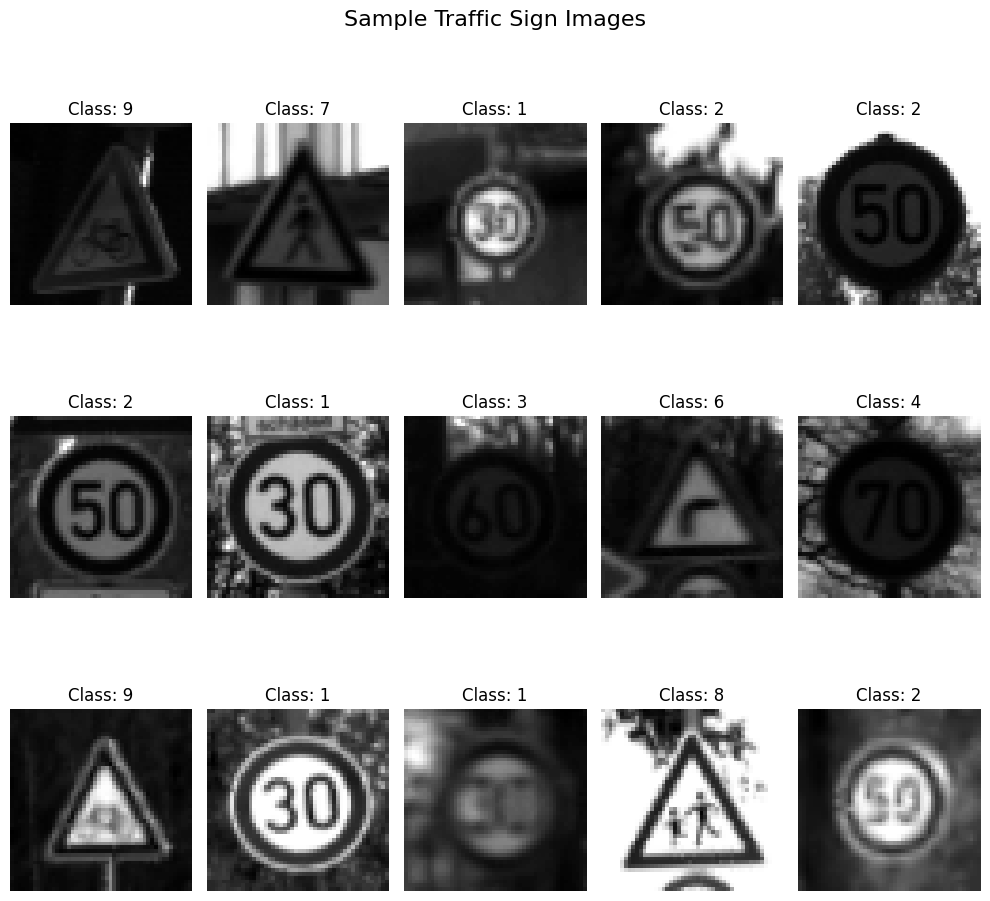

In [ ]:
num_samples = 15
sample_indices = np.random.randint(0, len(X_train_reshape), num_samples)

fig, axes = plt.subplots(3, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_samples:
        image = X_train_reshape[sample_indices[i]]
        img_class = y_train[sample_indices[i]]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Class: {img_class[0]}", fontsize=12)

plt.suptitle('Sample Traffic Sign Images', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
X_train_new = X_train_new/255
X_test_new = X_test_new/255
# X_train_new.shape

3.0

In [ ]:
nb_classifier = MultinomialNB()
cv_scores = cross_val_score(nb_classifier, X_train_new, y_train_new, cv=5)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_new, y_train_new)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test_new)
accuracy = accuracy_score(y_test_new, y_pred)

# roc_auc = roc_auc_score(y_test_new, y_pred)

print("========================================")
print("Accuracy Score is :", accuracy)
print("========================================")



Accuracy Score is : 0.3524251805985552


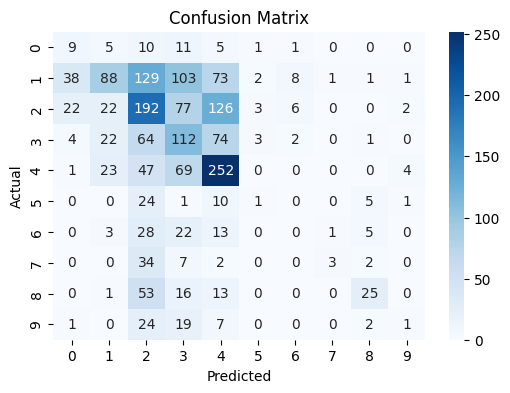

In [129]:
cm = confusion_matrix(y_test_new, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [120]:
df = X_train
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [121]:
df['label'] = y_train

In [122]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0


In [125]:
correlation_matrix = df.corr()

print(correlation_matrix['label'].sort_values(ascending=False))

label    1.000000
1714     0.224551
1762     0.205679
1761     0.202442
1743     0.200155
           ...   
746     -0.380518
1216    -0.380611
1167    -0.382932
1215    -0.400836
1263    -0.404019
Name: label, Length: 2305, dtype: float64
